# Unicorn Diversity Analysis
This project analyzes a dataset of unicorn startups (companies valued at over $1 billion) to gain insights into industry distributions, country trends, growth patterns, and diversity impact. The analysis includes:
- Data cleaning and transformation
- Exploratory data analysis (EDA)
- Advanced clustering and regression techniques
- Visualization of trends and patterns
- Computation of a custom metric: Diversity Impact Score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

unicorn_data = pd.read_csv("World_Wide_Unicorn_Startups.csv")
unicorn_data

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
...,...,...,...,...,...,...,...,...,...,...
931,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,12
932,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
933,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12
934,ReliaQuest,1.0,12/1/2021,United States,Tampa,Cybersecurity,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12


## Step 2: Data Cleaning
To ensure accurate analysis, we clean and preprocess the dataset. This includes:
- Standardizing industry names for consistency.
- Converting date columns to datetime format.
- Creating a new column, `Time_to_Unicorn`, to calculate the years it took for each company to achieve unicorn status.

In [2]:
# Data Cleaning
unicorn_data['Industry'] = unicorn_data['Industry'].replace("Finttech", "Fintech") 
unicorn_data['Industry'] = unicorn_data['Industry'].replace("Artificial intelligence", "Artificial Intelligence")
unicorn_data['Date'] = pd.to_datetime(unicorn_data['Date'], errors='coerce')
unicorn_data['Time_to_Unicorn'] = 2024 - unicorn_data['year']  # Calculate time-to-unicorn in years

## Step 3: Exploratory Data Analysis (EDA)
We explore the dataset to uncover patterns and distributions. The analysis focuses on:
1. The distribution of unicorns across industries.
2. The distribution of unicorns across countries.
3. The time it takes for companies to achieve unicorn status (`Time_to_Unicorn`).

In [3]:
# Exploratory Analysis
# Distribution of industries and countries
industry_counts = unicorn_data['Industry'].value_counts()
country_counts = unicorn_data['Country'].value_counts()

### Distribution of Unicorns by Industry
This bar chart shows the number of unicorn startups across various industries. It highlights the most popular sectors for unicorn startups.

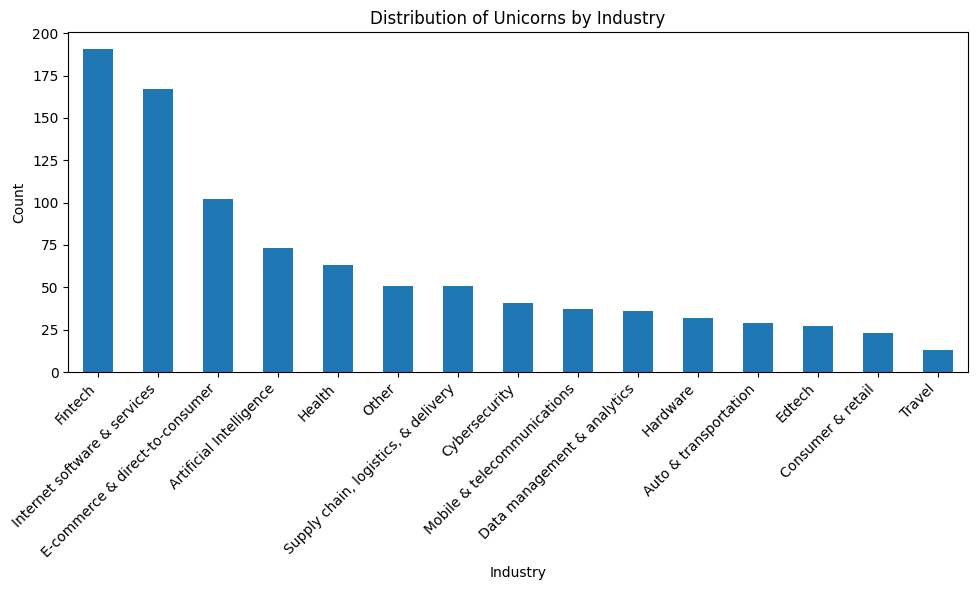

In [4]:
# Plot industry distribution
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', title='Distribution of Unicorns by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

### Distribution of Unicorns by Country
This bar chart shows the distribution of unicorn startups across different countries, highlighting global trends and the dominance of certain nations.

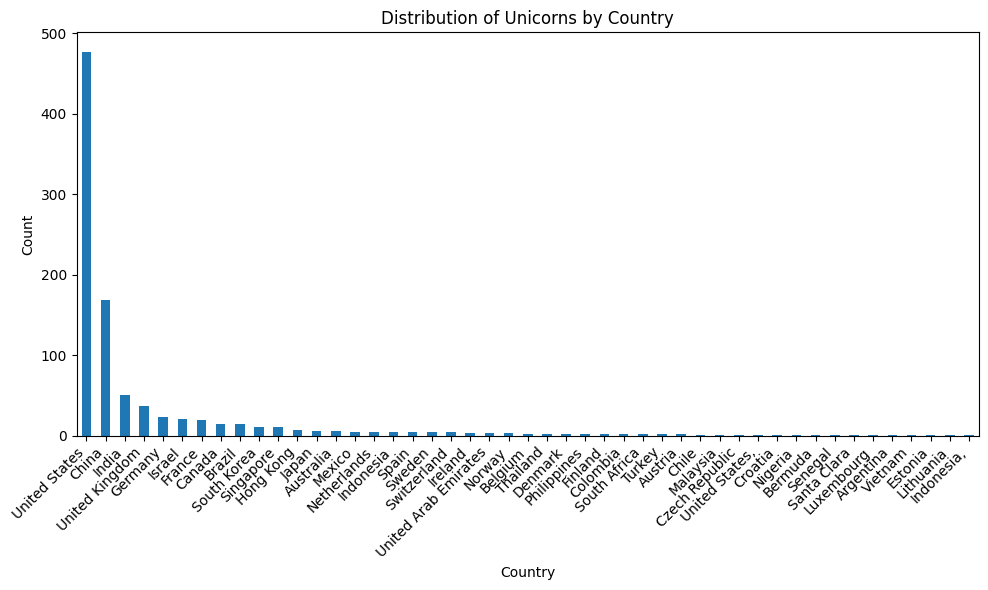

In [5]:
# Plot country distribution
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', title='Distribution of Unicorns by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

### Time to Unicorn Distribution
This histogram displays the time (in years) it took for companies to achieve unicorn status. It provides insights into the typical growth timeline for successful startups.

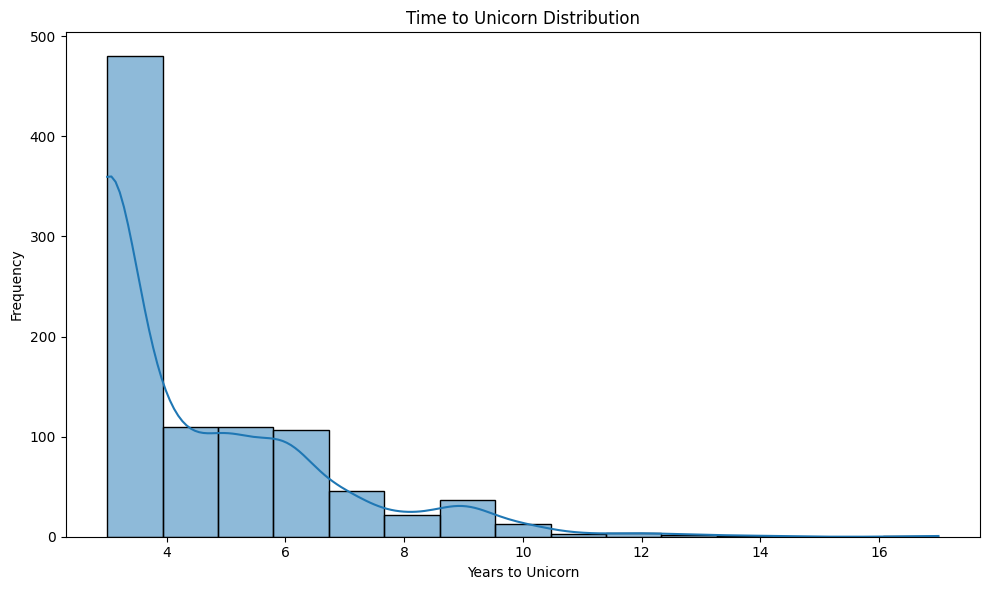

In [6]:
# Time-to-unicorn analysis
plt.figure(figsize=(10, 6))
sns.histplot(unicorn_data['Time_to_Unicorn'], bins=15, kde=True)
plt.title('Time to Unicorn Distribution')
plt.xlabel('Years to Unicorn')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Step 4: Top Industries by Valuation
This bar chart ranks industries by their average valuation. It highlights which sectors tend to produce the highest-value unicorns.

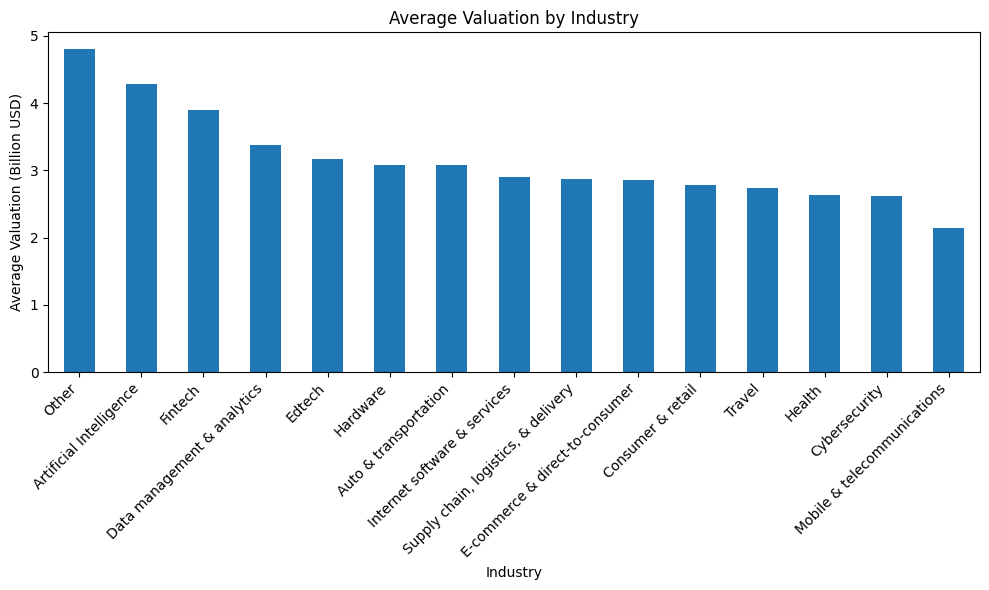

In [7]:
# Top industries by valuation
top_valued_industries = unicorn_data.groupby('Industry')['Valuation'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_valued_industries.plot(kind='bar', title='Average Valuation by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Valuation (Billion USD)')
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

## Step 5: Regression Analysis
We use linear regression to examine the relationship between a startup's time-to-unicorn and its valuation. This analysis aims to understand how time-to-market influences financial success.

In [8]:
# Advanced Analysis
# Regression to predict valuation
X = unicorn_data[['Time_to_Unicorn', 'year']]  # Features
y = unicorn_data['Valuation']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

reg_model = LinearRegression()
reg_model.fit(X_scaled, y)

LinearRegression()

### Regression Results
The regression coefficients show the relationship between `Time_to_Unicorn` and `Valuation`. A negative coefficient suggests that startups with shorter times to unicorn status tend to have higher valuations.

In [9]:
# Regression coefficients
coefficients = pd.DataFrame({
    'Feature': ['Time_to_Unicorn', 'year'],
    'Coefficient': reg_model.coef_
})
coefficients

,Feature,Coefficient
0,Time_to_Unicorn,-7.317901e+15
1,year,-7.317901e+15


## Step 6: Clustering Analysis
Using KMeans clustering, we group startups based on their valuation and time-to-unicorn. This helps identify patterns among startups with similar growth trajectories.

In [10]:
# Clustering startups by valuation and time-to-unicorn
clustering_data = unicorn_data[['Valuation', 'Time_to_Unicorn']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [11]:
# KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
unicorn_data['Cluster'] = kmeans.labels_

In [12]:
# Silhouette score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6379990285432106


### KMeans Clustering of Unicorn Startups
This scatter plot visualizes the clustering of startups based on their valuation and time-to-unicorn. Different clusters represent startups with similar growth patterns and market impacts.

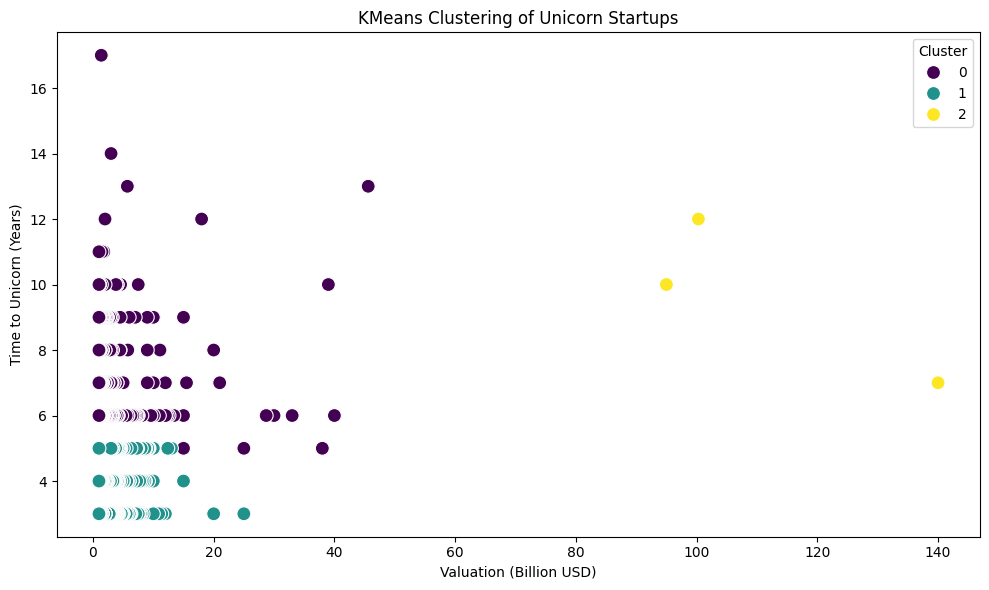

In [13]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['Valuation'],
    y=clustering_data['Time_to_Unicorn'],
    hue=kmeans.labels_,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering of Unicorn Startups')
plt.xlabel('Valuation (Billion USD)')
plt.ylabel('Time to Unicorn (Years)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Step 7: Heatmap of Unicorn Distribution
This heatmap shows the distribution of unicorn startups by country and industry. It highlights which industries dominate in specific regions.

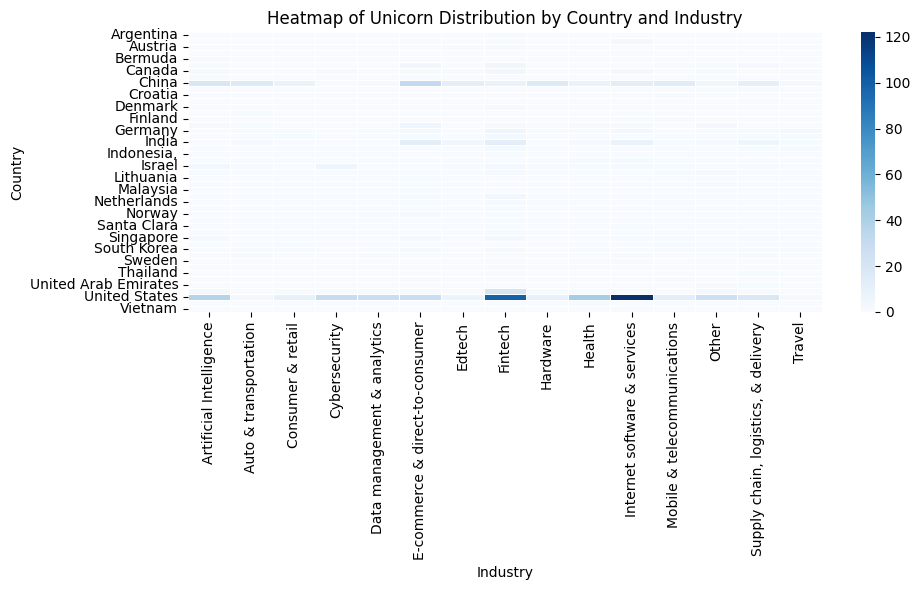

In [14]:
# Visualization
# Create heatmap for diversity metrics (placeholders used for now)
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(unicorn_data['Country'], unicorn_data['Industry']),
    cmap='Blues',
    linewidths=0.5,
    annot=False
)
plt.title('Heatmap of Unicorn Distribution by Country and Industry')
plt.tight_layout()
plt.show()


## Step 8: Diversity Impact Score
The Diversity Impact Score is a custom metric designed to measure a startup's efficiency in achieving high valuation relative to the time it took to become a unicorn. This metric is calculated by dividing a companies valuation by the time it takes to become a Unicorn company. Startups with a higher score have achieved significant valuation in a shorter time, indicating high growth impact.

In [15]:
# Create Diversity Impact Score (placeholder calculation)
unicorn_data['Diversity_Impact_Score'] = unicorn_data['Valuation'] / unicorn_data['Time_to_Unicorn']

### Top Startups by Diversity Impact Score
The table below highlights the top 10 startups with the highest Diversity Impact Scores. These startups are industry leaders in achieving rapid and high-value growth. You can see which countries each startup is from.

In [16]:
# Highlight startups with highest diversity impact
top_impact_startups = unicorn_data.nlargest(10, 'Diversity_Impact_Score')[['Company', 'Valuation', 'Time_to_Unicorn', 'Diversity_Impact_Score', 'Country']]
top_impact_startups

,Company,Valuation,Time_to_Unicorn,Diversity_Impact_Score,Country
0,Bytedance,140.0,7,20.000000,China
2,Stripe,95.0,10,9.500000,United States
1,SpaceX,100.3,12,8.358333,United States
11,FTX,25.0,3,8.333333,Hong Kong
6,Databricks,38.0,5,7.600000,United States
4,Canva,40.0,6,6.666667,Australia
14,J&T Express,20.0,3,6.666667,Indonesia
7,Revolut,33.0,6,5.500000,United Kingdom
8,Nubank,30.0,6,5.000000,Brazil
10,Chime,25.0,5,5.000000,United States


# Conclusion

This analysis provided valuable insights into the growth patterns, industry trends, and regional distributions of unicorn startups. Key findings include:

- **Industry Trends**: Fintech and Internet Services dominate as the most popular industries for unicorn startups, reflecting their appeal to investors and consumers.
- **Global Dominance**: The United States leads in the number of unicorns, followed by China and India, highlighting the importance of innovation ecosystems in these regions.
- **Growth Efficiency**: Startups with shorter time-to-unicorn generally achieve higher valuations, showcasing the importance of rapid growth in the startup lifecycle.
- **Diversity Impact Score**: This custom metric successfully highlights startups that efficiently achieve high valuations in less time, offering a new lens to evaluate growth impact.

### Future Directions
There are several opportunities to expand this research:
- **Founder and Team Diversity**: Investigate the role of diverse leadership teams in driving startup success.
- **Investor Influence**: Analyze how specific investors and funding rounds contribute to accelerated growth and valuations.
- **Market Dynamics**: Study how economic conditions and sector-specific trends influence the startup lifecycle.
- **Comparative Studies**: Perform regional and sectoral comparisons to identify unique growth dynamics and success factors.

By delving into these areas, future research can provide actionable insights to investors, policymakers, and entrepreneurs seeking to foster diverse, high-growth startup ecosystems.